# ML courses 6 & 7 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Subject

We have here a large data set that could help to predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 7 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  * Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor?
  * Encode the target and plot it with respect to mean radius (scatter plot of "target type" vs. "mean radius").
  * Do a train-test split and train a logistic regression.
  * On your latter plot, add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.
  * According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.
  * <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix.</font> 
  * <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?</font> 
* We decide to add an extra predictor to our model. 
  * Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  * Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  * <font color=red>How have the classification performances increased?</font> 
* Comparison of the two models: 
  * <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  * <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

* We check at first if the tumor radius is a good predictor for breast cancer.
  * Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor

## Data preparation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


**Loading the data set from Scikit-Learn**

In [14]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [15]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
print(len(data_all['data'][0]))

30


In [17]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
data_all.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**Getting a description of the data set**

In [20]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [21]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


In [23]:
features.shape # 30 columns

(569, 30)

**Preparing the data frame of the target**

In [24]:
target = pd.DataFrame(data=data_all.target, columns=['tumor_type'])
target.sample(n=8, random_state=1)
features['target'] = target
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor_type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [26]:
features['target']=target 
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [27]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
features.isna().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [29]:
features.shape


(569, 31)

In [30]:
features['target'].value_counts()


benign       357
malignant    212
Name: target, dtype: int64

D:\AnacondaPython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

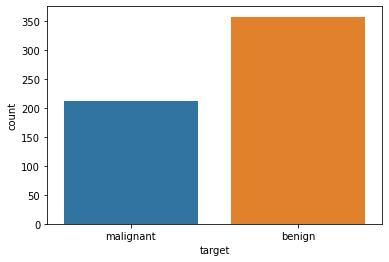

In [31]:
sns.countplot(features['target'], label = 'count')


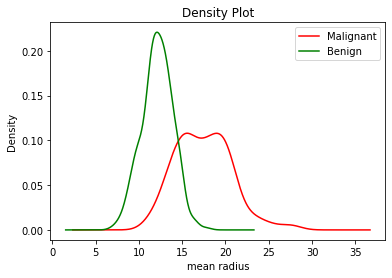

In [32]:
features['mean radius'][features['target'] == 'malignant'].plot(kind='density', c='red', label='Malignant')
features['mean radius'][features['target'] == 'benign'].plot(kind='density', c='green', label='Benign')
plt.xlabel('mean radius')
plt.title('Density Plot')
plt.legend()
plt.show()

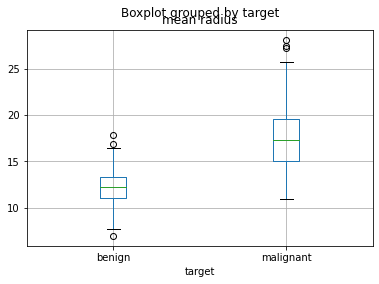

In [33]:
features.boxplot(column=["mean radius"], by='target')
plt.show()

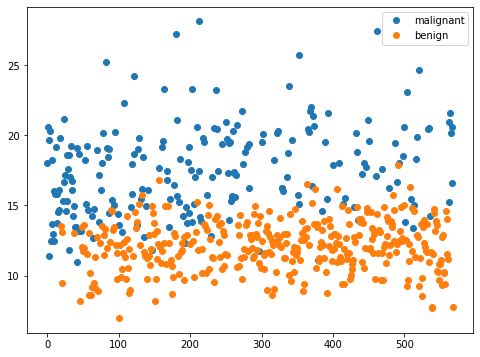

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(features[features['target']=='malignant']['mean radius'], marker='o', linestyle='', label='malignant')
plt.plot(features[features['target']=='benign']['mean radius'], marker='o', linestyle='', label='benign')
plt.legend()

# print(x)
# features[features['target']=='malignant']['mean radius'].plot(kind='scatter', x = "mean radius", y = "target", ax=ax)


In [35]:
featureMeans = list(features.columns[1:11])


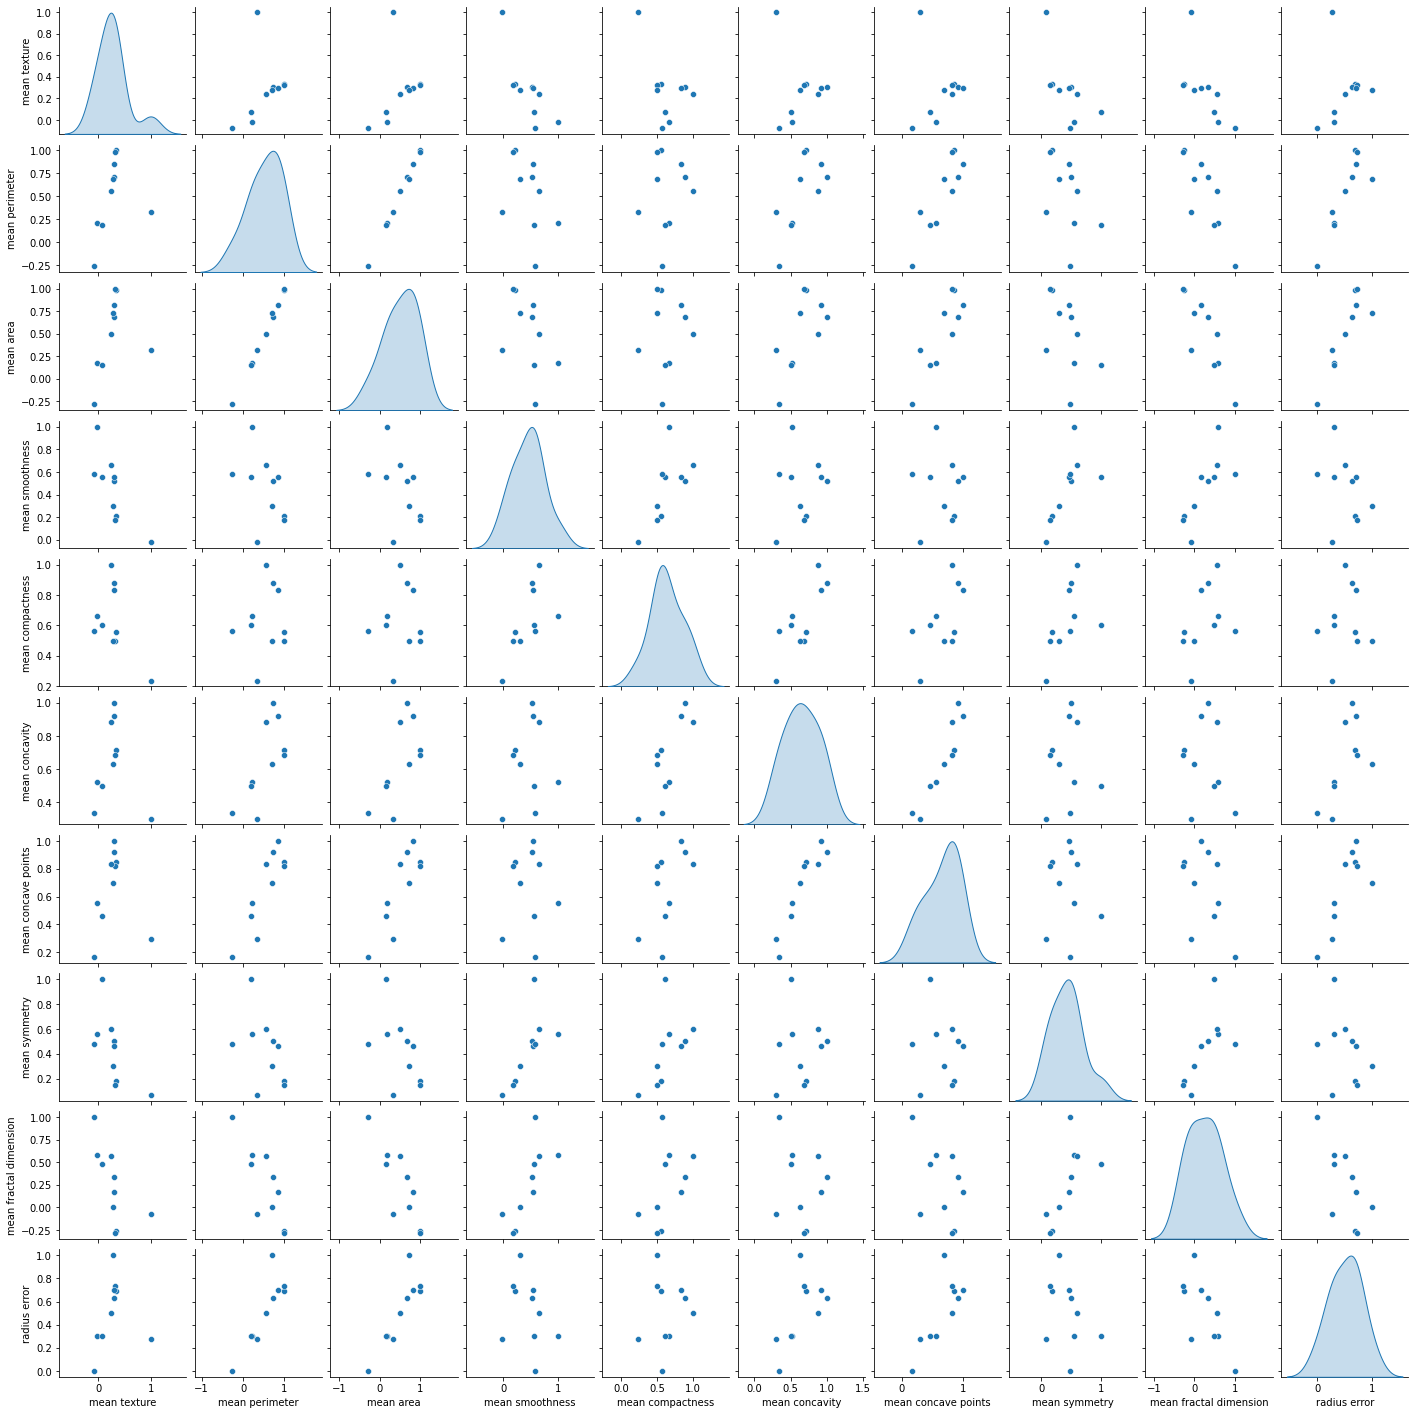

In [36]:
correlationData = features[featureMeans].corr()
sns.pairplot(features[featureMeans].corr(), diag_kind='kde', height = 2);

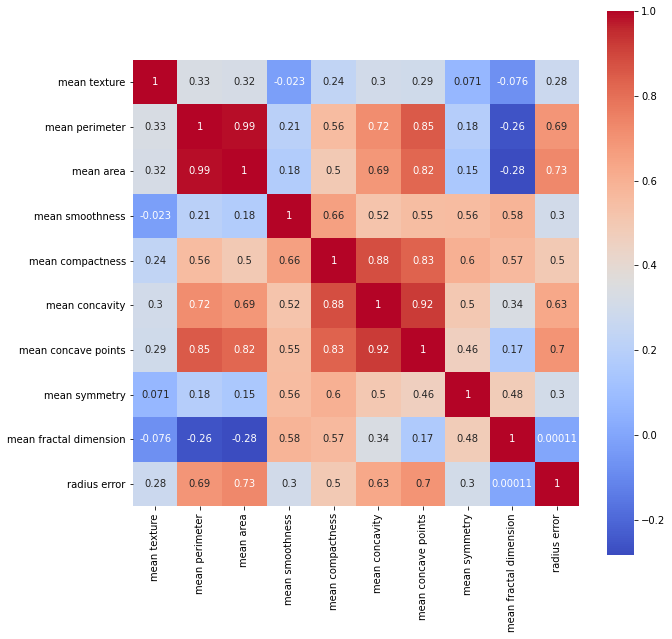

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(features[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [38]:
features['target'].value_counts()

benign       357
malignant    212
Name: target, dtype: int64

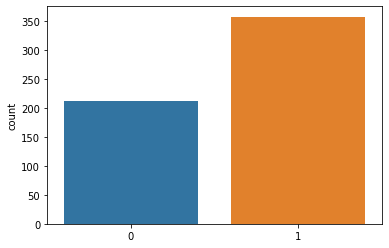

In [39]:
ax = sns.countplot(x="target", data=data_all, )


In [40]:
features.shape

(569, 31)

In [41]:
# 0 = Malignant
# 1 = Begin

D:\AnacondaPython\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaPython\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


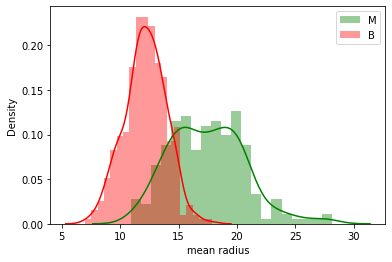

In [42]:
sns.distplot(features[features['target']=='malignant']['mean radius'], bins=20, color='green', label='M');
sns.distplot(features[features['target']=='benign']['mean radius'], bins=20, color='red', label='B');
plt.legend();

## Model with one Predictor

**Predictors and target:**

In [43]:
X = features[['mean radius']].values
print(X[:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


In [44]:
print(features['target'][:10].values)

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']


**Encoding:**

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(features['target'])
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


**Train-test split:**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [47]:
print(X_train[:10])

[[11.85 ]
 [11.22 ]
 [20.13 ]
 [13.59 ]
 [16.69 ]
 [12.06 ]
 [13.87 ]
 [12.56 ]
 [14.26 ]
 [ 9.029]]


**Feature scaling:**

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train[:10]

array([[-0.65079907],
       [-0.82835341],
       [ 1.68277234],
       [-0.16041087],
       [ 0.71326925],
       [-0.59161428],
       [-0.08149783],
       [-0.45069814],
       [ 0.02841677],
       [-1.44584797]])

## Training the logistic regression model

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [51]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[15]]))))

['malignant']


In [52]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[14.8]]))))

['benign']


## Making predictions

**Probability of purchasing:**

In [53]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]

array([[0.77864652, 0.22135348],
       [0.80627905, 0.19372095],
       [0.67015463, 0.32984537],
       [0.62161353, 0.37838647],
       [0.82996408, 0.17003592],
       [0.95612735, 0.04387265],
       [0.9207811 , 0.0792189 ],
       [0.94063649, 0.05936351],
       [0.99812743, 0.00187257],
       [0.98266889, 0.01733111]])

In [54]:
print(classifier.classes_)

[0 1]


(143, 1) (143,)


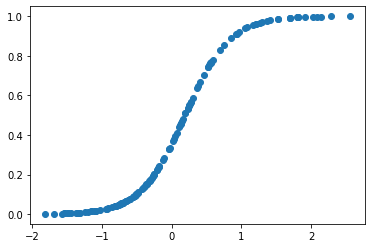

In [55]:
print(X_test.shape, y_proba[:,1].shape)
plt.scatter(X_test,y_proba[:,1])
plt.show()

In [56]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)[:15])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]


In [57]:
classifier.predict_proba(X_test)

array([[7.78646518e-01, 2.21353482e-01],
       [8.06279053e-01, 1.93720947e-01],
       [6.70154625e-01, 3.29845375e-01],
       [6.21613533e-01, 3.78386467e-01],
       [8.29964076e-01, 1.70035924e-01],
       [9.56127351e-01, 4.38726489e-02],
       [9.20781104e-01, 7.92188965e-02],
       [9.40636490e-01, 5.93635098e-02],
       [9.98127429e-01, 1.87257099e-03],
       [9.82668888e-01, 1.73311118e-02],
       [5.28894172e-01, 4.71105828e-01],
       [5.44303385e-01, 4.55696615e-01],
       [9.91852140e-01, 8.14785953e-03],
       [1.43345256e-01, 8.56654744e-01],
       [5.39908099e-01, 4.60091901e-01],
       [3.62158596e-01, 6.37841404e-01],
       [9.94036492e-01, 5.96350776e-03],
       [6.45142052e-03, 9.93548579e-01],
       [1.49636493e-02, 9.85036351e-01],
       [4.41782791e-03, 9.95582172e-01],
       [9.33325361e-01, 6.66746388e-02],
       [2.21564239e-01, 7.78435761e-01],
       [7.67780774e-01, 2.32219226e-01],
       [9.33325361e-01, 6.66746388e-02],
       [3.023306

**Confusion Matrix**

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


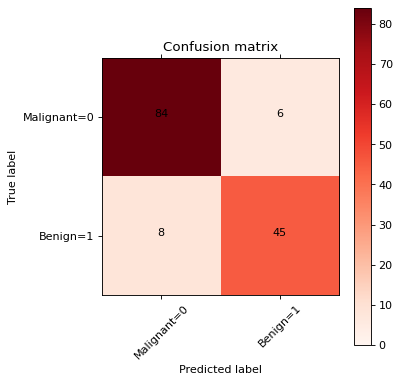

In [93]:
fig = plt.figure(figsize=(5, 5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)

classes=['Malignant=0','Benign=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.85


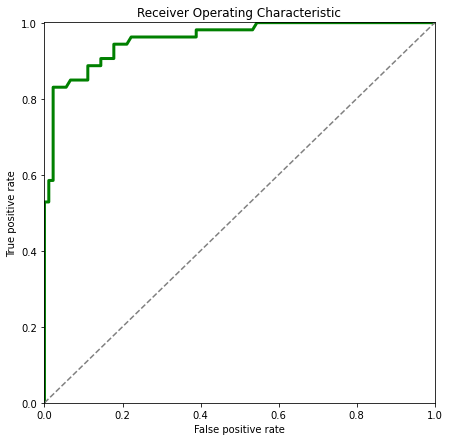

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [96]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9575471698113208


## **Adding new predictors**

Inspect the data in order to tell — between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).

<font color="green">Ans: Mean texture is less correlated with the mean area so, the mean texture will be the better option.
    
<font color = "green">As mean radius and mean perimeter and area are quite correlated to each other that means not much of information if we choose these, so mean texture is ideal.

D:\AnacondaPython\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaPython\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


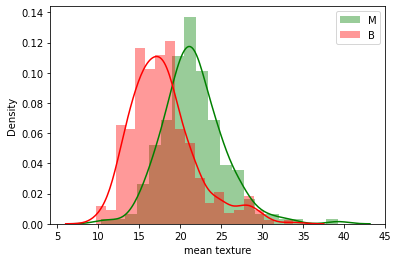

In [97]:
sns.distplot(features[features['target']=='malignant']['mean texture'], bins=20, color='green', label='M');
sns.distplot(features[features['target']=='benign']['mean texture'], bins=20, color='red', label='B');
plt.legend();

In [98]:
X1 = features[['mean radius', 'mean texture']].values
print(X[:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


In [99]:
print(features['target'][:10].values)

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']


In [100]:
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(features['target'])
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [102]:
print(X1_train[:10])

[[11.85  17.46 ]
 [11.22  19.86 ]
 [20.13  28.25 ]
 [13.59  17.84 ]
 [16.69  20.2  ]
 [12.06  18.9  ]
 [13.87  16.21 ]
 [12.56  19.07 ]
 [14.26  19.65 ]
 [ 9.029 17.33 ]]


In [103]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [104]:
X1_train[:10]

array([[-0.65079907, -0.43057322],
       [-0.82835341,  0.15226547],
       [ 1.68277234,  2.18977235],
       [-0.16041087, -0.33829042],
       [ 0.71326925,  0.23483428],
       [-0.59161428, -0.08087001],
       [-0.08149783, -0.73413503],
       [-0.45069814, -0.0395856 ],
       [ 0.02841677,  0.10126708],
       [-1.44584797, -0.46214364]])

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X1_train, y1_train)

print(label_encoder.inverse_transform(classifier.predict(sc.transform([[11, 5]]))))

print(label_encoder.inverse_transform(classifier.predict(sc.transform([[12, 11]]))))

['benign']
['benign']


In [106]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## Performance assessment

**Confusion Matrix**

**Prediction of the class and comparison with the true one:**

In [107]:
y1_pred = classifier.predict(X1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[83  7]
 [ 7 46]]


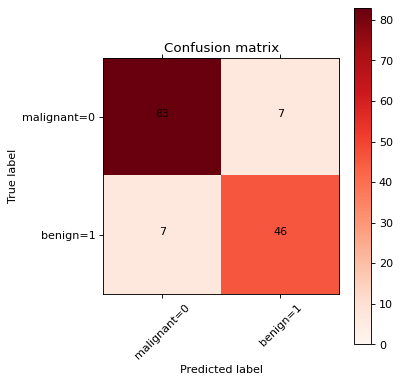

In [109]:
fig = plt.figure(figsize=(5,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['malignant=0','benign=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [110]:
y1_proba = classifier.predict_proba(X1_test)
y1_proba[:10]

array([[0.73772676, 0.26227324],
       [0.55593482, 0.44406518],
       [0.81493988, 0.18506012],
       [0.67812157, 0.32187843],
       [0.85861081, 0.14138919],
       [0.96409106, 0.03590894],
       [0.85774994, 0.14225006],
       [0.94590859, 0.05409141],
       [0.99407949, 0.00592051],
       [0.99378262, 0.00621738]])

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y1_test, y1_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y1_test, y1_pred),2)))

print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y1_test, y1_pred),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.87


**Single Predictor result Vs Multiple**
- Accuracy (proportion of correct predictions) is 0.9
- Precision (proportion of true purchases among purchase predictions) is 0.88
- Recall (proportion of true purchases that are correctly predicted) is 0.85


Here after adding predictor the Precision has been decreased from 0.88 to 0.87
while recall is increased from 0.85 to 0.87


<font color="green">Precision is about being precisei.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct.   
In your prediction case, when your Logistic Regression model predicted patients are going to suffer from cancer, that patients have 88% of the time.

<font color = "green">Recall: If there are patients who have cancer in the test set and your Logistic Regression model can identify it 87% of the time.

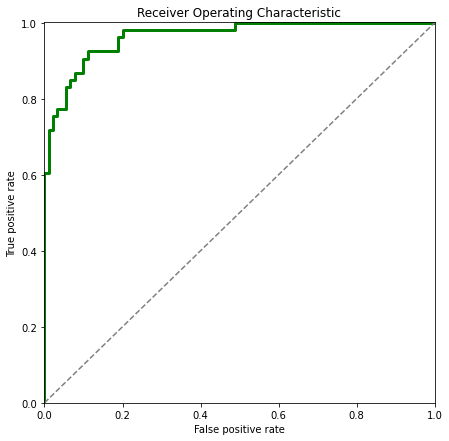

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

y1_score = y1_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y1_test, y1_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


plt.show()

In [113]:
print('AUC: ', roc_auc_score(y1_test, y1_score))

AUC:  0.9654088050314464


In [114]:
from sklearn.metrics import log_loss



In [116]:
log_loss(y_test, y_pred)

3.38145221757574

In [117]:
log_loss(y1_test, y1_pred)

3.381457809166161

As the accuracy of both are similar the log loss is also similar for both model.

**Conclusion**   

On both ocasion, the accuracy remains same as 0.9.   

The precion is decreased   
and   
recall has been increased after adding second predictors i.e mean texture.